Primer laboratorio aprendiendo herramienta de data analysis y data science.
Consta del analisis de un DataSet de futbol europeo (futbolistas y partidos). https://www.kaggle.com/hugomathien/soccer


Empezamos importando las librerias

In [1]:
import sqlite3    #Para interactuar con databases relacionales locasles
import pandas as pd  #Manipulacion de datos
import numpy as np   #Manipulacion de datos
import matplotlib.pyplot as plt   #Visualizacion de datos
from sklearn.cluster import KMeans   #Algoritmos especificos de Machine Learning
from sklearn.preprocessing import scale   #Algoritmos especificos de Machine Learning
from customplot import *    #Funciones especificas dadas por el curso para el notebook

Ahora leemos el DataSet

In [2]:

cnx = sqlite3.connect('databas.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

<h1>Explorando Datos<!h1>

Empezamos la exploracion de datos generando una estadistica simple de los datos.
     Miramos las columnas del DataSet usando un atributo de pandas llamado "columns".

In [3]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

Siguiente, vamos a mostrar una estadistica simple de nuestro DataSet.

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


<h2>Limpieza de datos: Manejando datos perdidos</h2>
<br>
<p>Cuando se manejan datos reales, pocas veces esta completamente maquetado y con datos 100% correctos. Es necesario estar seguros de limpiar los datos convirtiendo los datos perdidos en datos legibles o borrando datos inconprensibles.</p>
<p>La siguiente celda mostrara si hay alguna posicion vacia</p>

In [5]:
#¿Alguna fila esta vacia (NULL)?
df.isnull().any().any(), df.shape

(True, (183978, 42))

<p>Ahora averiguaremos cuantas posiciones hay vacias.</p>

In [6]:
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

<h1>Arreglando valores nulos: Eliminando valores "0".</h1>
<p>En la siguiente linea, eliminaremos los valores nulos.

In [7]:
rows = df.shape[0]

df = df.dropna()

Ahora si revisamos los valores nulos, llegaremos a la conclusion de que fueron eliminados.

In [8]:
#Chekeamos si todos los valores nulos fueron eliminados
print(rows)
df.isnull().any().any(), df.shape

183978


(False, (180354, 42))

<p>Para saber cuantas lineas eliminamos, tenemos que restar el numero de lineas actual al numero original de filas.</p>

In [9]:
rows - df.shape[0]

3624

<p>Como el Dataset es grande, podemos mirar unas pocas lineas a la vez. En vez de mirar siempre las primeras (o ultimas) N lineas, podemos mirar un numero de lineas random. De esta manera nos aseguramos que nuestros datos no estan en un orden en particular cuando tratamos de tomar muestras de el Dataset</p>

In [10]:
#Mezclamos las filas de df asi tenemos muestras distribuidas de lineas.
df = df.reindex(np.random.permutation(df.index))

<h1>Prediciendo: 'overall_rating' de un jugador </h1>
<p>Ahora que nuestra limpieza de datos es razonablemente completa y podemos confiar y entender un poco mejor los datos, divagaremos mas profundamente en el Dataset.</p>
<br>
<h3>Miremos las primeras filas del Dataset.</h3>
<p>Usaremos la funcion head para data frames en esta tarea. Nos data cada columna en cada fila.</p>

In [11]:
df.head(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
777,778,189568,148827,2015-09-21 00:00:00,69.0,74.0,left,high,medium,70.0,...,64.0,52.0,58.0,70.0,65.0,14.0,10.0,10.0,7.0,8.0
168622,168623,157310,41191,2015-09-21 00:00:00,75.0,75.0,left,medium,medium,75.0,...,77.0,73.0,57.0,60.0,49.0,7.0,9.0,9.0,12.0,12.0
114201,114202,224425,556029,2015-11-06 00:00:00,66.0,77.0,left,high,medium,64.0,...,49.0,52.0,20.0,26.0,28.0,12.0,15.0,7.0,16.0,8.0
10067,10068,189432,108525,2007-02-22 00:00:00,65.0,75.0,left,medium,low,46.0,...,63.0,66.0,11.0,12.0,11.0,14.0,5.0,13.0,5.0,5.0
55035,55036,182105,171981,2007-08-30 00:00:00,75.0,87.0,right,medium,medium,21.0,...,46.0,56.0,21.0,21.0,23.0,75.0,68.0,61.0,71.0,79.0


<p>Generalmente estamos interesados en mostrar solo algunas columnas. En este caso podemos usar la opcion de pandas para seleccionar columnas de nuestro interes.</p>

In [12]:
df[:10][['penalties', 'overall_rating']]

,penalties,overall_rating
777,52.0,69.0
168622,73.0,75.0
114201,52.0,66.0
10067,66.0,65.0
55035,56.0,75.0
111542,66.0,67.0
42611,39.0,60.0
31430,56.0,75.0
22470,51.0,74.0
116956,21.0,69.0


<h2>Analisis de correlacion de Caracteristicas</h2>
<p>Veremos si la columna 'penalties' esta correlacionada con 'overall_rating'. Usaremos una operacion de seleccion similar pero de todas las filas y con la funcion de correlacion.</p>

<h2>¿Estan correlacionadas? Usamos el coeficiente de correlacion de Pearson.</h2>
<a href = "https://www.questionpro.com/blog/es/coeficiente-de-correlacion-de-pearson/">Explicacion coeficiente de Pearson</a>

In [13]:
df['overall_rating'].corr(df['penalties'])

0.3927151079111885

<p>Como el indice de Pearson va de -1 a +1, y un valor de 0 daria que no existe correlacion ninguna, esperaremos poder realizar predicciones significativas con la correlacion resultante: 0.39<p>

<h2>Crearemos una lista de potenciales caracteristicas las cuales podriamos medir correlaciones.</h2>

In [14]:
potentialFeatures = ['acceleration', 'curve', 'free_kick_accuracy', 'ball_control', 'shot_power', 'stamina']

<p>Con una estructura de repeticion 'for' se mostrara los coeficientes de correlacion de la caracteristica 'overall_rating' de un jugador con cada caracteristica añadida anteriormente.</p>

In [18]:
#Miraremos como las caracteristicas se correlacionan con overall_rating

for f in potentialFeatures:
    related = df['overall_rating'].corr(df[f])
    print("%s: %f" % (f,related))

acceleration: 0.243998
curve: 0.357566
free_kick_accuracy: 0.349800
ball_control: 0.443991
shot_power: 0.428053
stamina: 0.325606


<h2>¿Que caracteristica tiene mayor correlacion con overall_rating?</h2>
<p>Vemos impresas en pantalla todas las correlaciones realizadas. Podemos observar que ball_control y shot_power son las correlaccoines que se acercan mas a +1.</p>

<h1>Visualicacion de Datos.</h1>
<p>Vamos a empezar a  mostrar las correlaciones de cada una de las caracteristicas con "overall_rating". Empezamos seleccionando las columnas y creando una lista con los coeficientes de correlacion.</p>

In [20]:
cols = ['potential',  'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

In [23]:
#Creamos la lista conteniendo los coeficientes Pearson entre "overall_rating" y cada columna de cols

correlations = [ df['overall_rating'].corr(df[f]) for f in cols]

In [24]:
len(cols), len(correlations)

(34, 34)

<p>Nos aseguramos que el numero de correlaciones sea igual al numero de columnas en cols. Seguidamente usamos pandas para crear graficos 2D</p>

In [28]:
#creamos una funcion para realizar el grafico

def plot_dataframe(df, y_label):
    color = 'coral'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label)
    
    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation= 75);
    plt.show()

In [29]:
#creamos un dataFrame utilizanco las columnas y correlaciones

df2 = pd.DataFrame({'attributes':cols, 'correlation': correlations})

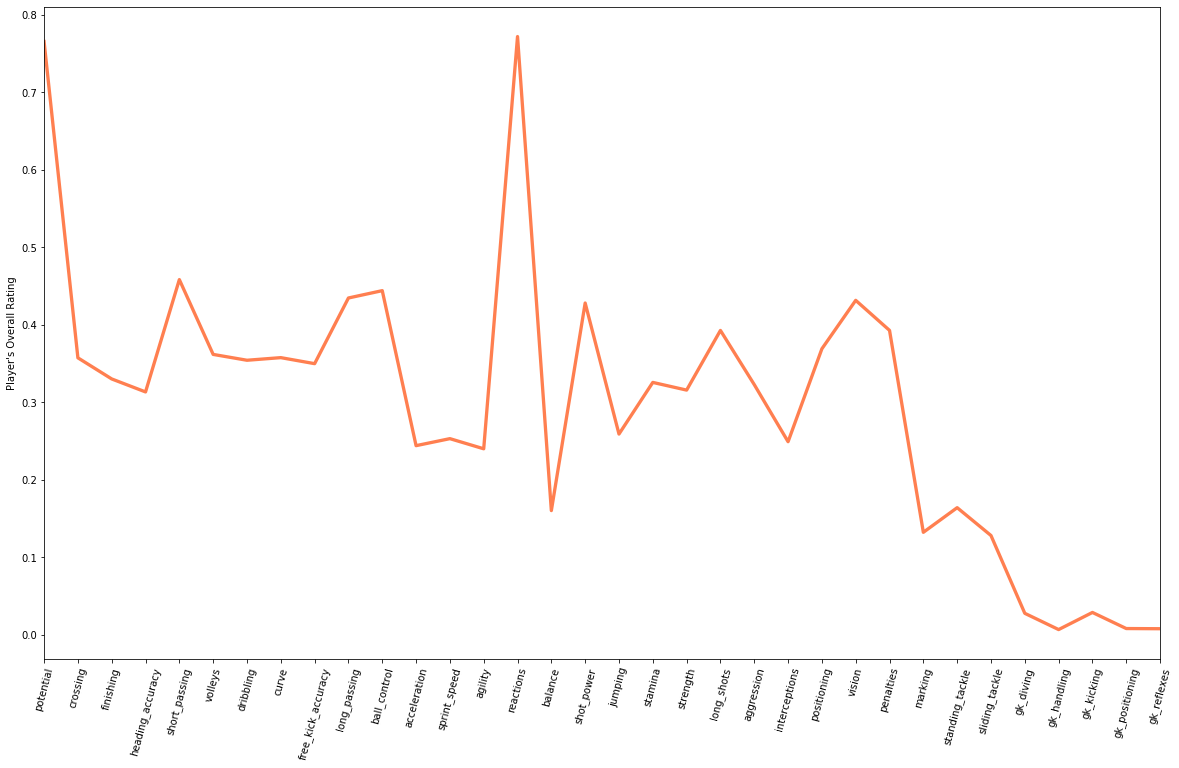

In [30]:
#Ploteamos el dataframe

plot_dataframe(df2, 'Player\'s Overall Rating')

<h2 style = "color: red;">Analisis de conclusiones.</h2>

<p>Ahora analizaremos lo que graficamos. Podemos ver los picos en el grafico, indicando las correlaciones mas altas.</p>

<h2 style = "color: blue;">Separando jugadores en grupos similares.</h2>
<p>Hasta ahora hemos realizado estadistica basica mediante coeficiente de correlacion para empezar a formar una opinion. Seguimos separando los jugadores similares en grupos.</p>
<br>
<h2>Seleccion de caracteristicas en cada grupo de jugadores</h2>

In [34]:
# Definimos las caracteristicas que queremos usar para separar en grupos

select5features = ['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']
select5features

['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']

In [36]:
#Generamos un nuevo dataframe seleccionando las caracteristicas que acabamos de definir

df_select = df[select5features].copy(deep=True)

In [37]:
df_select.head()

,gk_kicking,potential,marking,interceptions,standing_tackle
777,10.0,74.0,58.0,67.0,70.0
168622,9.0,75.0,57.0,35.0,60.0
114201,7.0,77.0,20.0,42.0,26.0
10067,13.0,75.0,11.0,22.0,12.0
55035,61.0,87.0,21.0,34.0,21.0


<h2> Realizacion de algoritmo de agrupamiento KMeans Clustering</h2>
<p>Ahora usaremos un metodo de machine learning llamado KMeans para separar los valores</p>

In [39]:
#

data = scale(df_select)

#definimos numero de grupos
noOfClusters = 4

#Entrenamos el modelo
model = KMeans(init='k-means++', n_clusters=noOfClusters, n_init=20).fit(data)

In [40]:
print(90*'_')
print("\nCount of player in each cluster")
print(90*'_')

pd.value_counts(model.labels_, sort=False)

__________________________________________________________________________________________

Count of player in each cluster
__________________________________________________________________________________________


0    50424
1    55905
2    50238
3    23787
dtype: int64

In [41]:
#

p = pd_centers(featuresUsed=select5features, centers=model.cluster_centers_)
p

,gk_kicking,potential,marking,interceptions,standing_tackle,prediction
0,-0.041808,0.705545,1.028477,0.983329,1.030945,0
1,-0.477134,0.105567,-0.947581,-0.975180,-0.914152,1
2,-0.336408,-0.842370,0.548750,0.407653,0.551354,2
3,1.920531,0.038315,-1.110692,-0.652083,-1.199968,3


<h2 style = "color:blue;"> Visualizacion de los grupos</h2>
<p> Ahora que tenemos los 4 grupos basados en las caracteristicas que seleccionamos, las visualizaremos.</p>

In [42]:
#para graficar adentro del notebook usaremos el siguioente comando

%matplotlib inline

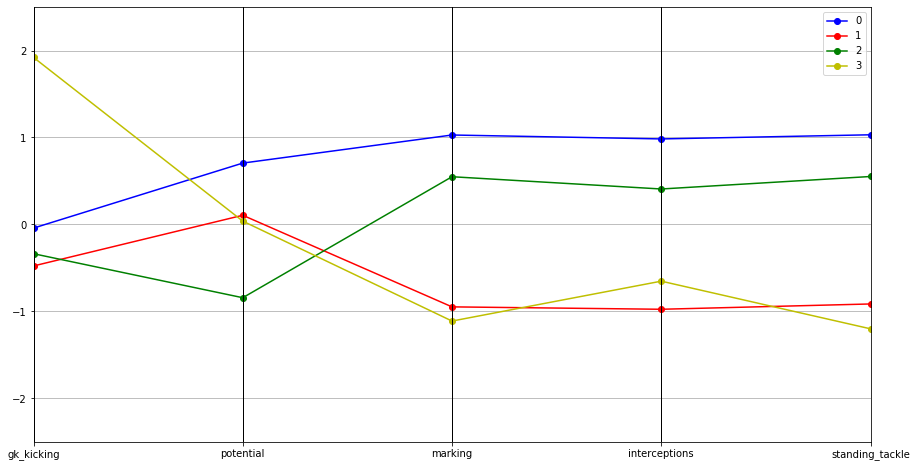

In [43]:
parallel_plot(p)

<h2 style ="color:violet;"> Analizando conclusiones</h2>
<p>Dos grupos son muy similares excepto en 'gk_kicking'.</p>
<p>Dos grupos son paralelamente iguales excepto en 'potential'.</p>